<a href="https://colab.research.google.com/github/Leonardo-Naar/biblioteca_pandas/blob/main/Desafio_4_Modelo_de_Regress%C3%A3o_para_Marketing_DNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
# Carregando os dados do CSV

base = pd.read_csv('/content/MKT.csv')

# Exibindo as primeiras linhas do DataFrame para entender a estrutura dos dados

base.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [6]:
# Puxando as informações do DataFrame para saber se tem algum dado nulo e se os tipos de cada coluna estão de acordo

base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [7]:
# Obtendo estatísticas descritivas das variáveis numéricas para ver possíveis outliers e se tem alguma possivel inconsistência

print(base.describe())

          youtube    facebook   newspaper       sales
count  171.000000  171.000000  171.000000  171.000000
mean   178.021053   27.671579   35.240000   16.922807
std    102.449597   17.913532   24.902918    6.314608
min      0.840000    0.000000    0.360000    1.920000
25%     91.080000   11.700000   13.740000   12.540000
50%    179.760000   26.760000   31.080000   15.480000
75%    262.980000   43.680000   50.880000   20.820000
max    355.680000   59.520000  121.080000   32.400000


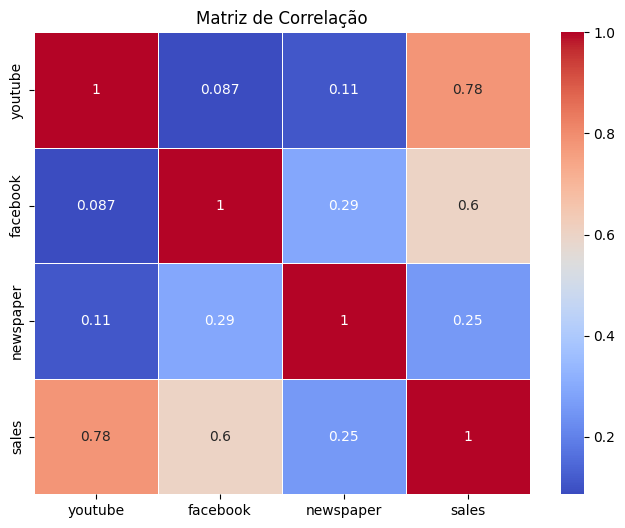

In [8]:
# Visualizando a matriz de correlação entre as variáveis numéricas

matriz_corr = base.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

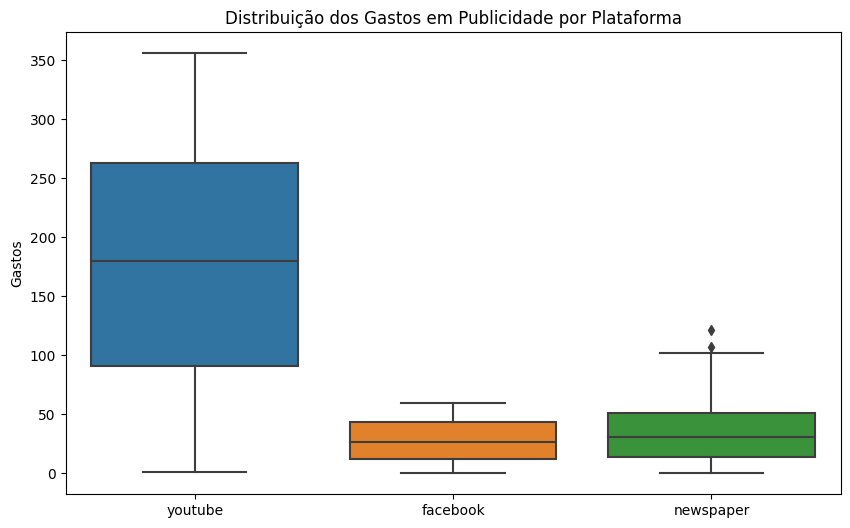

In [9]:
# Visualizando a distribuição dos gastos em cada plataforma usando box plot

plt.figure(figsize=(10, 6))
sns.boxplot(data=base[['youtube', 'facebook', 'newspaper']])
plt.title('Distribuição dos Gastos em Publicidade por Plataforma')
plt.ylabel('Gastos')
plt.show()

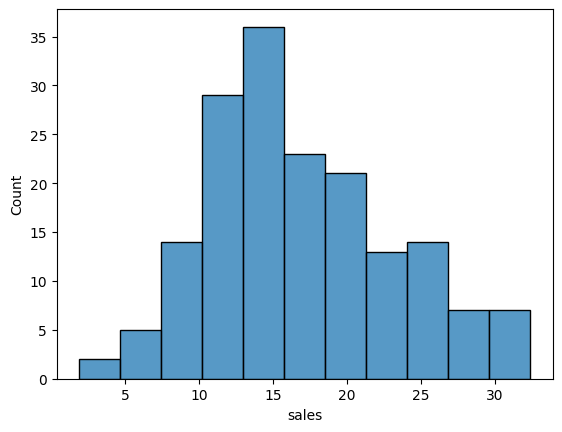

In [10]:
# Visualizando a distribuição das vendas

sns.histplot(base["sales"]);

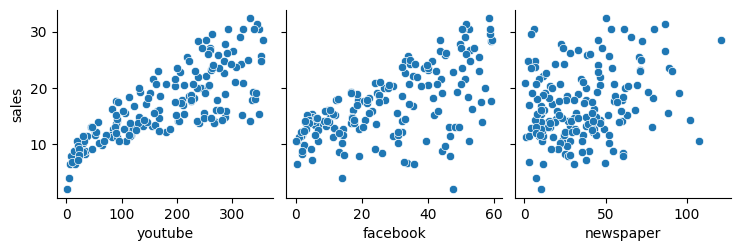

In [11]:
# Criando gráficos de dispersão para analisar tendências dos dados, em relação às vendas.

sns.pairplot(base, x_vars=['youtube', 'facebook', 'newspaper'], y_vars="sales");

In [12]:
# Dividindo os dados em variáveis

X = base[['youtube', 'facebook', 'newspaper']]
y = base['sales']

# Dividindo os dados em conjuntos de treinamento e teste (70% treinamento, 30% teste)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Trazendo a forma de cada variável

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 3)
(52, 3)
(119,)
(52,)


In [22]:
# Inicializando o modelo de regressão linear

model = LinearRegression()

# Treinando o modelo com os dados de treinamento

model.fit(X_train, y_train)

# Fazendo previsões com o modelo nos dados de teste

y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo coeficiente de determinação (R²)

r2 = r2_score(y_test, y_pred)

print(f'R-squared (R²): {r2:.2f}')

R-squared (R²): 0.88


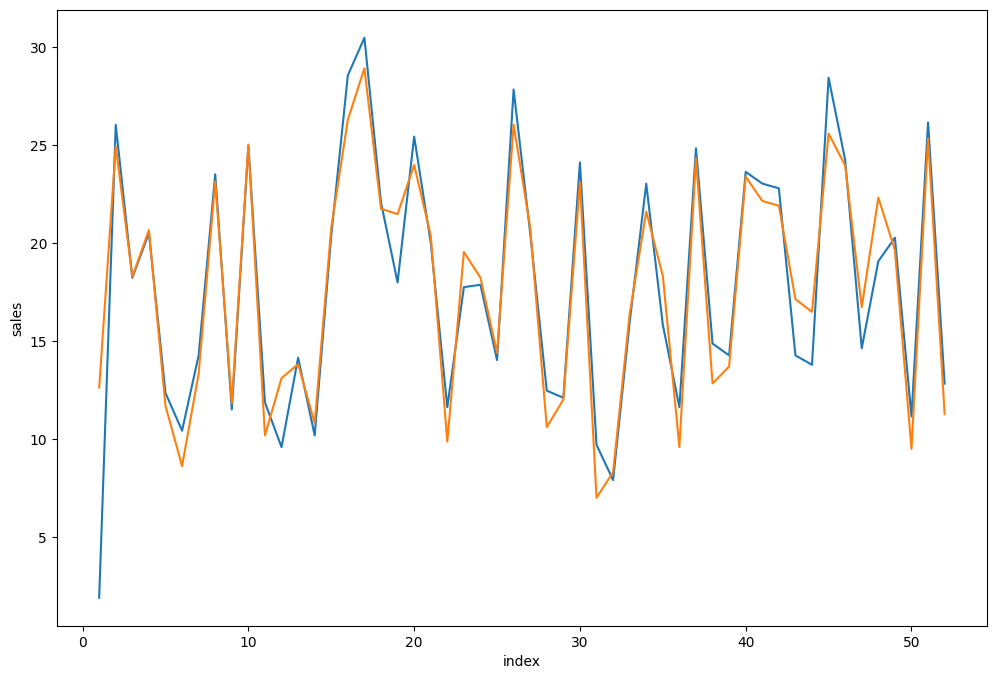

In [16]:
# Trazendo um gráfico de linhas para fazer o comparativo entre teste e previsão

c = [i for i in range(1, 53, 1)]
fig = plt.figure(figsize=(12,8))
plt.plot(c, y_test)
plt.plot(c, y_pred)
plt.xlabel("index")
plt.ylabel("sales");

In [21]:
# Definindo um exemplo de investimento em marketing [YouTube, Facebook, Jornais] respectivamente

investimento = [[100, 50, 25]]

# Realizando a previsão de retorno de vendas

retorno_vendas = model.predict(investimento)

print(f'Investimento em marketing: {investimento[0]}')
print(f'Previsão de Retorno de Vendas: {retorno_vendas[0]:.2f}')

Investimento em marketing: [100, 50, 25]
Previsão de Retorno de Vendas: 17.59


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
